# Estimating Parameters in Network Models

Throughout Chapter 5, we spent a lot of attention developing intuition for many of the network models that are essential to understanding random networks. Recall that the notation that we use for a random network (more specifically, a network-valued random variable), $\mathbf A$, does *not* refer to any network we could ever hope to see (or as we introduced in the previous chapter, *realize*) in the real world. This issue is extremely important in network machine learning, so we will try to drive it home one more time: no matter how much data we collected (unless we could get infinite data, which we *can't*), we can never hope to understand the true distribution of $\mathbf A$. As network scientists, this leaves us with a bit of a problem: what, then, can we do to make useful claims about $\mathbf A$, if we can't actually see $\mathbf A$ nor its distribution?

This is where statistics, particularly, **estimation**, comes into play. At a very high level, estimation is a procedure to calculate properties about a random variable (or a set of random variables) using *only* the data we are given: finitely many (in network statistics, often just *one*) samples which we assume are *realizations* of the random variable we want to learn about. The properties of the random variable that we seek to learn about are called **estimands**, and  In the case of our network models, in particular, we will attempt to obtain reasonable estimates of the parameters (our *estimands*) associated with random networks.

Several key assumptions will be heavily used throughout the course of this chapter, which were developed in Chapter 5. In particular, the most common two properties we will leverage are:
1. Independence of edges: when working with independent-edge random network models, we will assume that edges in our random network are *independent*. This means that the probability of observing a particular realization of a random network is, in fact, the product of the probabilities of observing each edge in the random network. Notationally, what this means is that if $\mathbf A$ is a random network with $n$ nodes and edges $\mathbf a_{ij}$, and $A$ is a realization of that random network with edges $a_{ij}$, then:
\begin{align*}
    \mathbb P_\theta(\mathbf A = A) &= \mathbb P(\mathbf a_{11} = a_{11}, \mathbf a_{12} = a_{12}, ..., \mathbf a_{nn} = a_{nn}) \\
    &= \prod_{i, j} \mathbb P_\theta(\mathbf a_{ij} = a_{ij})
\end{align*}
In the special case where our networks are simple (undirected and loopless), this simplifies to:
\begin{align*}
    \mathbb P_\theta(\mathbf A = A) &= \prod_{i < j} \mathbb P_\theta(\mathbf a_{ij} = a_{ij})
\end{align*}
for any network realization $A$ which is simple. This is because if $\mathbf a_{ij} = a$, then we also know that $\mathbf a_{ji} = a$, and we only need to worry about one of the edges (we chose the edges in the upper right triangle of the adjacency matrix arbitrarily).  Further, since $A$ is also simple, then we know hat $\mathbf a_{ii} = 0$; that is, no nodes have loops, so we don't need to worry about the case where $i = j$ either.

## The Coin Flip Example

Let's think about what exactly this means using an example that you are likely familiar with. I have a single coin, and I want to know the probability of the outcome of a roll of that coin being a heads. For sake of argument, we will call this coin *fair*, which means that the true probability it lands on heads (or tails) is $0.5$. In this case, I would call the outcome of the $i^{th}$ coin flip the random variable $\mathbf x_i$, and it can produce realizations which take one of two possible values: a heads (an outcome of a $1$) or a tails (an outcome of a $0$). We will say that we see $10$ total coin flips. We will number these realizations as $x_i$, where $i$ goes from $1$ to $10$. To recap, the boldfaced $\mathbf x_i$ denotes the random variable, and the unbolded $x_i$ denotes the realization which we actually see. Our question of interest is: how do we estimate the probability of the coin landing on a heads, if we don't know anything about the true probability value $p$, other than the outcomes of the coin flips we got to observe?

Here, since $\mathbf x_i$ takes the value $1$ or $0$ each with probability $0.5$, we would say that $\mathbf x_i$ is a $Bernoulli(0.5)$ random variable. This means that the random variable $\mathbf x$ has the Bernoulli distribution, and the probability of a heads, $p$, is $0.5$. All $10$ of our $\mathbf x_i$ are called *identically distributed*, since they all have the same $Bernoulli(0.5)$ distribution.

We will also assume that the outcomes of the coin flips are mutually independent, which is explained in the terminology section.

For any one coin flip, the probability of observing the outcome $i$ is, by definition of the Bernoulli distribution:
\begin{align*}
    \mathbb P_\theta(\mathbf x_i = x_i) = p^{x_i} (1 - p)^{1 - x_i}
\end{align*}
Note that we use the notation $\mathbb P_\theta$ to indicate that the probability is a function of the parameter set $\theta$ for the random variable $\mathbf x_i$. Here, since the only parameter for each $\mathbf x_i$ is a probability $p$, then $\theta = p$.

If we saw $n$ total outcomes, the probability is, using the definition of mutual independence:
\begin{align*}
    \mathbb P_\theta(\mathbf x_1 = x_1, ..., \mathbf x_{n} = x_{n}; p) &= \prod_{i = 1}^{n}\mathbb P(\mathbf x_i = x_i) \\
    &= \prod_{i = 1}^n p^{x_i}(1 - p)^{1 - x_i} \\
    &= p^{\sum_{i = 1}^n x_i}(1 - p)^{n - \sum_{i = 1}^n x_i}
\end{align*}
What if we saw $10$ coin flips, and $6$ were heads? Can we take a "guess" at what $p$ might be? Intuitively your first reaction might be to say a good guess of $p$, which we will abbreviate $\hat p$, would be $0.6$, which is $6$ heads of $10$ outcomes. In many ways, this intuitive guess is spot on. However, in network machine learning, we like to be really specific about why, exactly, this guess makes sense. 

Looking at the above equation, one thing we can do is use the technique of **maximum likelihood estimation**. We call the function $\mathbb P(\mathbf x_1 = x_1, ..., \mathbf x_n = x_n; p)$ the *likelihood* of our sequence, for a given value of $p$. Note that we have added the term "$; p$" to our notation, which is simply to emphasize the dependence of the likelihood on the probability. So, what we *really* want to do is find the value that $p$ could take, which *maximizes* the likelihood. Let's see what the likelihood function looks like as a function of different values of $p$:

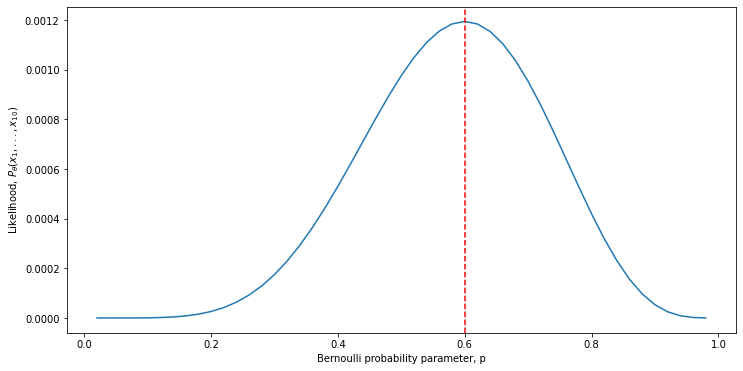

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

p = np.linspace(.02, .98, num=49)
nflips = 10; nheads = 6
likelihood = p**(nheads)*(1 - p)**(nflips - nheads)

fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(x=p, y=likelihood, ax=ax)
ax.axvline(.6, color="red", linestyle="--")
ax.set(xlabel="Bernoulli probability parameter, p", ylabel="Likelihood, $P_{\\theta}(x_1, ..., x_{10})$")
ax;

As we can see, it turns out that our intuitive answer, that $p=0.6$, is in fact the Maximum Likelihood Estimate for the Bernoulli probability parameter $p$. Now how do we go about showing this rigorously?

An easier problem, we often will find, is to instead maximize the *log likelihood* rather than the likelihood itself. This is because the log function is *monotone*, which means that if $\mathbb P(\mathbf x_1 = x_1, ..., \mathbf x_n = x_n; p_1) < \mathbb P(\mathbf x_1 = x_1, ..., \mathbf x_n = x_n; p_2)$, then $\log\mathbb P(\mathbf x_1 = x_1, ..., \mathbf x_n = x_n; p_1) < \log \mathbb P(\mathbf x_1 = x_1, ..., \mathbf x_n = x_n; p_2)$ as well for some choices $p_1$ and $p_2$. Without going too down in the weeds, the idea is that the $\log$ function does not change any critical points of the likelihood. The log likelihood of the above expression is:
\begin{align*}
\log \mathbb P(\mathbf x_1 = x_1, ..., \mathbf x_{n} = x_{n}; p) &= \log \left[p^{\sum_{i = 1}^n x_i}(1 - p)^{n - \sum_{i = 1}^n x_i}\right] \\
&= \sum_{i = 1}^n x_i \log(p) + \left(n - \sum_{i = 1}^n x_i\right)\log(1 - p)
\end{align*}
And visually, the log-likelihood now looks instead like this:

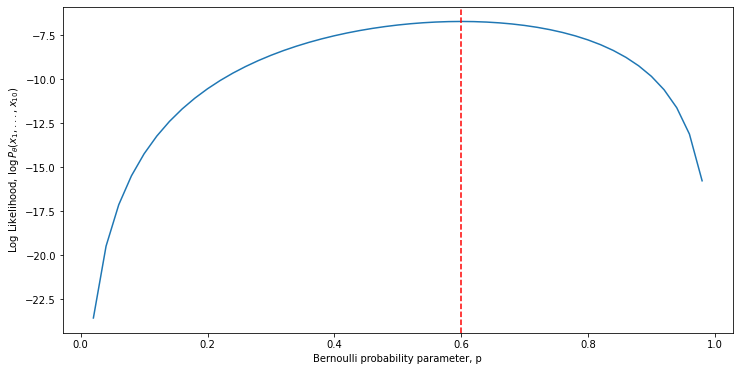

In [2]:
loglikelihood = nheads*np.log(p) + (nflips - nheads)*np.log(1 - p)


fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(x=p, y=loglikelihood, ax=ax)
ax.axvline(.6, color="red", linestyle="--")
ax.set(xlabel="Bernoulli probability parameter, p", ylabel="Log Likelihood, $\\log P_{\\theta}(x_1, ..., x_{10})$")
ax;

Although we can see that the two plots look *almost* nothing alike, the key is the word *almost* here. Notice that the absolute maximum is, in fact, the same regardless of whether we use the likelihood or the log-likelihood. Further, notice that at the maximum, the slope of the tangent line is $0$. You may recall from calculus that this is how we typically go about finding a critical point of a function. Now, let's get make our argument a little more technical. Remembering from calculus $1$ and $2$, to find a maximal point of the log-likelihood function with respect to some variable $p$, our process looks like this:
1. Take the derivative of the log-likelihood with respect to $p$,
2. Set it equal to $0$ and solve for the critical point $p^*$,
3. Verify that the critical point $p^*$ is indeed an estimate of a maximum, $\hat p$. 

Proceeding using the result we derived above, and using the fact that $\frac{d}{du} \log(u) = \frac{1}{u}$ and that $\frac{d}{du} \log(1 - u) = -\frac{1}{1 - u}$:
\begin{align*}
\frac{d}{d p}\log \mathbb P(\mathbf x_1 = x_1, ..., \mathbf x_{n} = x_{n}; p) &= \frac{\sum_{i = 1}^n x_i}{p} - \frac{n - \sum_{i = 1}^n x_i}{1 - p} = 0 \\
\Rightarrow \frac{\sum_{i = 1}^n x_i}{p} &= \frac{n - \sum_{i = 1}^n x_i}{1 - p} \\
\Rightarrow (1 - p)\sum_{i = 1}^n x_i &= p\left(n - \sum_{i = 1}^n x_i\right) \\
\sum_{i = 1}^n x_i - p\sum_{i = 1}^n x_i &= pn - p\sum_{i = 1}^n x_i \\
\Rightarrow p^* &= \frac{1}{n}\sum_{i = 1}^n x_i
\end{align*}
We use the notation $p^*$ here to denote that $p^*$ is a critical point of the function.

Finally, we must check that this is an estimate of a maximum, which we can do by taking the second derivative and checking that the second derivative is negative. We will omit this since it's a bit intricate and tangential from our argument, but if you work it through, you will find that the second derivative is indeed negative at $p^*$. This means that $p^*$ is indeed an estimate of a maximum, which we would denote by $\hat p$.

Finally, using this result, we find that with $6$ heads in $10$ outcomes, we would obtain an estimate:
\begin{align*}
    \hat p &= \frac{6}{10} = 0.6
\end{align*}
which exactly aligns with our intuition.

So, why do we need estimation tools, if in our example, our intuition gave us the answer a whole lot faster? Unfortunately, the particular scenario we described was one of the *simplest possible examples* in which a parameter requires estimation. As the scenario grows more complicated, and *especially* when we extend to network-valued data, figuring out good ways to estimate parameters is extremely difficult. For this reason, we will describe some tools which are very relevant to network machine learning to learn about network parameters.

We will review estimation techniques for several of the approaches we discussed in Chapter 5, for Single Network Models.

## Erdös-Rényi (ER)

Recall that the Erdös-Rényi (ER) network has a single parameter: the probability of each edge existing, which we termed $p$. Due to the simplicity of a random network which is ER, fortunately we can resort to the Maximum Likelihood technique we delved into in the coin example above, and it turns out we obtain a very similar result with some caveats. In Chapter 5, we explored the derivation for the probability of observing a realization $A$ of a given random network $\mathbf A$ which is ER, which is equivalent to the likelihood of $A$. Recall this was:

\begin{align*}
    \mathbb P_\theta(A) &= p^{m} \cdot (1 - p)^{\binom{n}{2} - m}
\end{align*}

where $m = \sum_{i < j} a_{ij}$ is the total number of edges in the observed network $A$. Our approach here parallels directly the approach for the coin; we begin by taking the log of the probability:

\begin{align*}
    \log \mathbb P_\theta(A) &= \log \left[p^{m} \cdot (1 - p)^{\binom{n}{2} - m}\right] \\
    &= m \log p + \left(\binom n 2 - m\right)\log (1 - p)
\end{align*}

Next, we take the derivative with respect to $p$, set equal to $0$, and we end up with:
\begin{align*}
\frac{d}{d p}\log \mathbb P_\theta(A) &= \frac{m}{p} - \frac{\binom n 2 - m}{1 - p} = 0 \\
\Rightarrow p^* &= \frac{m}{\binom n 2}
\end{align*}
We omitted several detailed steps due to the fact that we show the rigorous derivation above. Checking the second derivative, which we omit since it is rather mathematically tedious, we see that the second derivative at $p^*$ is negative, so we indeed have found an estimate of the maximum, and will be denoted by $\hat p$. This gives that the Maximum Likelihood Estimate (or, the MLE, for short) of the probability $p$ for a random network $\mathbf A$ which is ER is:

\begin{align*}
    \hat p &= \frac{m}{\binom n 2}
\end{align*}

Let's work on an example. We will use a realization of a random network which is ER, with $40$ nodes and an edge probability of $0.2$. We begin by simulating and visualizing the appropriate network: 

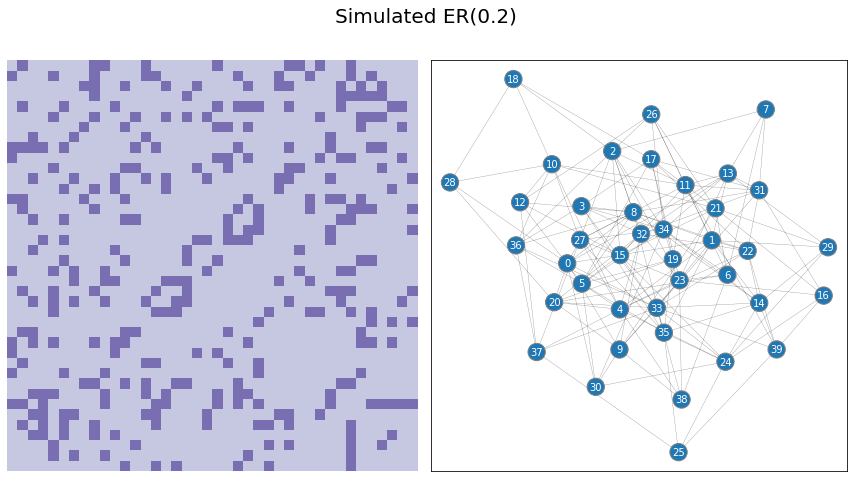

In [3]:
from graspologic.simulations import er_np
from graphbook_code import draw_multiplot

A = er_np(n=40, p=0.2)

draw_multiplot(A, title="Simulated ER(0.2)");

Next, we fit the appropriate model, from graspologic, and plot the estimated probability matrix $\hat P$ against the true probability matrix $P$:

In [4]:
from graspologic.plot import heatmap
import matplotlib.pyplot as plt
import numpy as np
from graspologic.models import EREstimator

model = EREstimator(directed=False, loops=False)
model.fit(A)
Phat = model.p_mat_

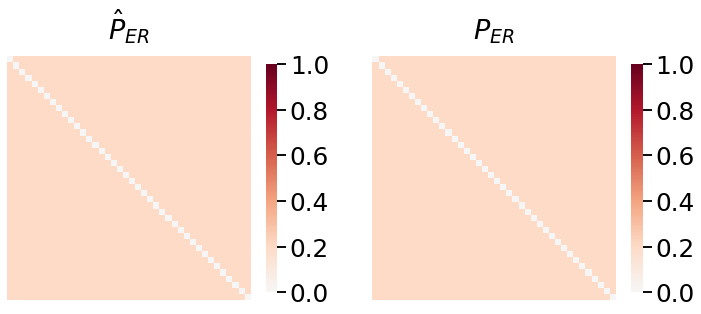

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

heatmap(Phat,
        vmin=0,
        vmax=1,
        font_scale=1.5,
        title="$\hat P_{ER}$",
        ax=axs[0])

P = 0.2*np.ones((40, 40))  # default entries to 0.2
P = P - np.diag(np.diag(P))

heatmap(P,
        vmin=0,
        vmax=1,
        font_scale=1.5,
        title="$P_{ER}$",
        ax=axs[1])

fig;

Not half bad! The estimated probability matrix $\hat P$ looks extremely similar to the true probability matrix $P$.

## *a priori* Stochastic Block Model

The *a priori* Stochastic Block Model also has a single paramter: the block matrix, $B$, whose entries $b_{kk'}$ denote the probabilities of edges existing or not existing between pairs of communities in the Stochastic Block Model. When we derived the probability for a realization $A$ of a random network $\mathbf A$ which could be characterized using the *a priori* Stochasic Block Model, we obtained that:
\begin{align*}
    \mathbb P_\theta(A) &= \prod_{k, k' \in [K]}b_{k'k}^{m_{k'k}} \cdot (1 - b_{k'k})^{n_{k'k - m_{k'k}}}
\end{align*}

where $n_{k'k} = \sum_{i < j}\mathbb 1_{\tau_i = k}\mathbb 1_{\tau_j = k'}$ was the number of possible edges between nodes in community $k$ and $k'$, and $m_{k'k} = \sum_{i < j}\mathbb 1_{\tau_i = k}\mathbb 1_{\tau_j = k'}a_{ij}$ was the number of edges in the realization $A$ between nodes within communities $k$ and $k'$. 

Noting that the log of the product is the sum of the logs, or that $\log \prod_i x_i = \sum_i \log x_i$, the log of the probability is:
\begin{align*}
    \log \mathbb P_\theta(A) &= \sum_{k, k' \in [K]} m_{k'k}\log b_{k'k} + \left(n_{k'k} - m_{k'k}\right)\log(1 - b_{k'k})
\end{align*}

We notice a side-note that we mentioned briefly in the network models section: in a lot of ways, the probability (and consequently, the log probability) of a random network which is an *a priori* SBM behaves very similarly to that of a random network which is ER, with the caveat that the probability term $p$, the total number of possible edges $\binom n 2$, and the total number of edges $m$ have been replaced with the probability term $b_{k'k}$, the total number of possible edges $n_{k'k}$, and the total number of edges $m_{k'k}$ which *apply only to that particular pair of communities*. In this sense, the *a priori* SBM is kind of like a collection of communities of ER networks. Pretty neat right? Well, it doesn't stop there. When we take the partial derivative of $\log \mathbb P_\theta(A)$ with respect to any of the probability terms $b_{l'l}$, we see an even more direct consequence of this observation:
\begin{align*}
    \frac{\partial }{\partial b_{l' l}}\log \mathbb P_\theta(A) &= \frac{\partial}{\partial b_{l'l}}\sum_{k, k' \in [K]} m_{k'k}\log b_{k'k} + \left(n_{k'k} - m_{k'k}\right)\log(1 - b_{k'k}) \\
    &= \sum_{k, k' \in [K]} \frac{\partial}{\partial b_{l'l}}\left[m_{k'k}\log b_{k'k} + \left(n_{k'k} - m_{k'k}\right)\log(1 - b_{k'k})\right]
\end{align*}
Now what? Notice that any of the summands in which $k \neq l$ and $k' \neq l'$, the partial derivative with respect to $b_{l'l}$ is in fact exactly $0$! Why is this? Well, let's consider a $k$ which is different from $l$, and a $k'$ which is different from $l'$. Notice that:
\begin{align*}
\frac{\partial}{\partial b_{l'l}}\left[m_{k'k}\log b_{k'k} + \left(n_{k'k} - m_{k'k}\right)\log(1 - b_{k'k})\right] = 0
\end{align*}
which simply follows since the quantity to the right of the partial derivative is not a funcion of $b_{l'l}$ at all! Therefore:
\begin{align*}
    \frac{\partial }{\partial b_{l' l}}\log \mathbb P_\theta(A) &= 0 + \frac{\partial}{\partial b_{l'l}}\left[m_{l'l}\log b_{l'l} + \left(n_{l'l} - m_{l'l}\right)\log(1 - b_{l'l})\right] \\
    &= \frac{m_{l'l}}{b_{l'l}} - \frac{n_{l'l} - m_{l'l}}{1 - b_{l'l}} = 0 \\
\Rightarrow b_{l'l}^* &= \frac{m_{l'l}}{n_{l'l}}
\end{align*}

Like above, we omit the second derivative test, and conclude that the MLE of the block matrix $B$ for a random network $\mathbf A$ which is *a priori* SBM is the matrix $\hat B$ with entries:
\begin{align*}
    \hat b_{l'l} &= \frac{m_{l'l}}{n_{l'l}}
\end{align*}

Let's work through an example network, with 20 nodes in each community, and a block matrix of:
\begin{align*}
    B &= \begin{bmatrix}
        .8 & .2 \\
        .2 & .8
    \end{bmatrix}
\end{align*}

Which corresponds to a probability matrix $P$ where each entry is:
\begin{align*}
    p_{ij} &= \begin{cases}
    0.8 & i, j \leq 20 \text{ or }i, j \geq 20 \\
    0.2 & \text{otherwise}
    \end{cases}
\end{align*}

We begin by simulating an appropriate SBM:

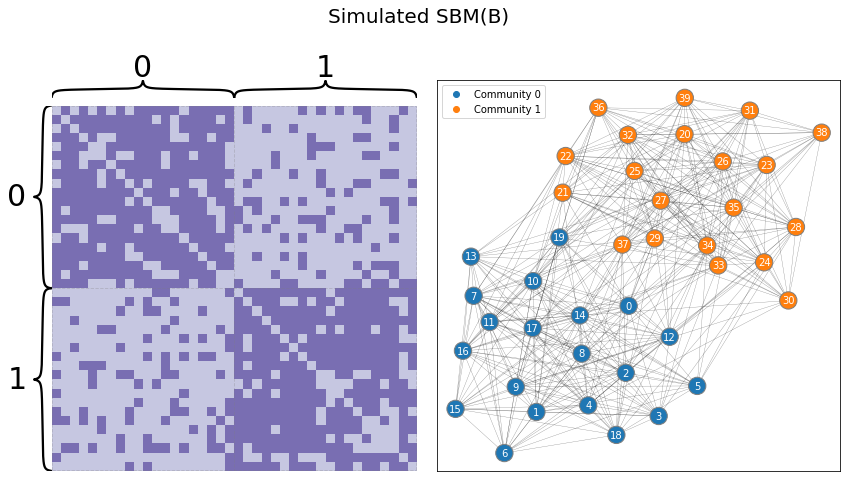

In [6]:
from graspologic.simulations import sbm

n = [20, 20]
B = [[.8, .2],
     [.2, .8]]

A = sbm(n=n, p=B)

y = [0 for i in range(0,n[0])] + [1 for i in range(0, n[1])]
draw_multiplot(A, labels=y, title="Simulated SBM(B)");

Next, let's fit an appropriate SBM, and investigate the estimate of $B$:

In [7]:
from graspologic.models import SBMEstimator

model = SBMEstimator(directed=False, loops=False)
model.fit(A, y=y)
Phat = model.p_mat_

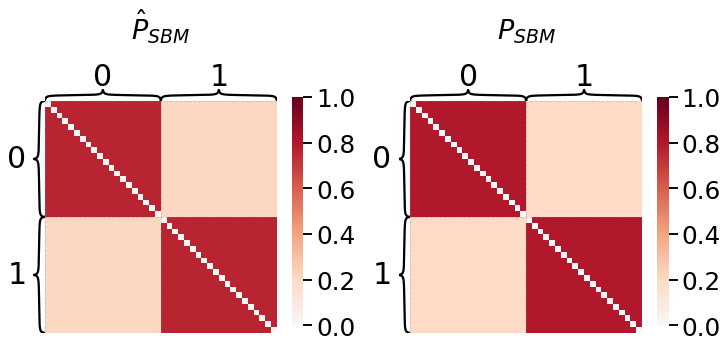

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

heatmap(Phat,
        inner_hier_labels=y,
        vmin=0,
        vmax=1,
        font_scale=1.5,
        title="$\hat P_{SBM}$",
        ax=axs[0])

P = 0.2*np.ones((n[0] + n[1], n[0] + n[1]))  # default entries to 0.2
P[0:20,0:20] = 0.8  # B11
P[20:40,20:40] = 0.8  # B22
np.fill_diagonal(P, 0)  # loopless

heatmap(P,
        inner_hier_labels=y,
        vmin=0,
        vmax=1,
        font_scale=1.5,
        title="$P_{SBM}$",
        ax=axs[1])

fig;

And our estimate $\hat P$ is very similar to the true probability matrix $P$.

## *a priori* Random Dot Product Graph

Next up, you might think intuitively we would jump to the a posteriori Stochastic Block Model, but as we will see in a second, estimation for an a posteriori Stochastic Block Model is, in fact, additional steps for a Random Dot Product Graph. The a posteriori Stochastic Block Model has a pair of parameters, the block matrix, 𝐵, and the community probability vector, 𝜋⃗ . If you are keeping up with the log-likelihood derivations in the single network models section, you will recall that the log-likelihood for an a posteriori Stochastic Block Model, we obtain that:

\begin{align*}
    \mathbb P_\theta(A) &= \sum_{\vec \tau \in \mathcal T} \prod_{k = 1}^K \left[\pi_k^{n_k}\cdot \prod_{k'=1}^K b_{k' k}^{m_{k' k}}(1 - b_{k' k})^{n_{k' k} - m_{k' k}}\right]
\end{align*}

That expression, it turns out, is a lot more complicated than what we had to deal with for the *a priori* Stochastic Block Model. Taking the log gives us that:

\begin{align*}
\log 
    \mathbb P_\theta(A) &= \log\left(\sum_{\vec \tau \in \mathcal T} \prod_{k = 1}^K \left[\pi_k^{n_k}\cdot \prod_{k'=1}^K b_{k' k}^{m_{k' k}}(1 - b_{k' k})^{n_{k' k} - m_{k' k}}\right]\right)
\end{align*}

Whereas the log of a product of terms is the sum of the logs of the terms, no such easy simplification exists for the log of a *sum* of terms. This means that we will have to get a bit creative here. Instead, we will turn first to the *a priori* Random Dot Product Graph, and then figure out how to estimate parameters from a *a posteriori* SBM using that.

The *a priori* Random Dot Product Graph has a single parameter, $X \in \mathbb R^{n \times d}$, which is a real matrix with $n$ rows (one for each node) and $d$ columns (one for each latent dimension). We estimate $X$ extremely simply for a realization $A$ of a random network $\pmb A$ which is characterized using the *a priori* Random Dot Product Graph.

In order to produce an estimate of $X$, we also need to know the number of latent dimensions of $\pmb A$, $d$. We might have a reasonable ability to "guess" what $d$ is ahead of time, but this will often not be the case. For this reason, we can instead estimate $d$ using $\hat d$ [cite ZG2]. $\hat d$ represents an estimate of $d$, which is selected on the basis of "elbow picking", as described in the section on spectral embedding. The estimate of $X$ is produced by using the [Adjacency Spectral Embedding](link?), by embedding the observed network $A$ into $d$ (if the number of latent dimensions is known) or $\hat d$ (if the number of latent dimensions is not known) dimensions.

Let's try an example of an *a priori* RDPG. We will use the same example that we used in the single network models section, where we defined the latent position matrix $X$ as follows. Let's assume that we have $60$ people who live along a very long road that is $20$ miles long, and each person is $\frac{1}{3}$ of a mile apart. The nodes of our network represent the people who live along our assumed street. If two people are closer to one another, it might make sense to think that they have a higher probability of being friends. If two people are neighbors, we think that they will have a very high probability of being friends (almost $1$) and when people are very far apart, we think that they will have a very low probability of being friends (almost $0$). We define $X$ to have rows given by:
\begin{align*}
    \vec x_i = \begin{bmatrix}
        \left(\frac{60 - i}{60}\right)^2 \\
        \left(\frac{i}{60}\right)^2
    \end{bmatrix}
\end{align*}
In this case, since each $\vec x_i$ is $2$-dimensional, the number of latent dimensions in $X$ is $d=2$. Let's simulate an example network:

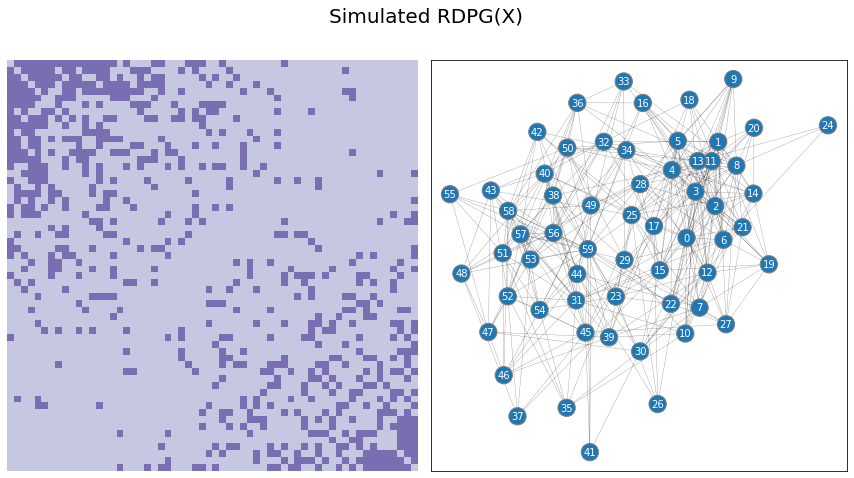

In [9]:
from graspologic.simulations import rdpg

n = 60  # the number of nodes in our network

# design the latent position matrix X according to 
# the rules we laid out previously
X = np.zeros((n,2))
for i in range(0, n):
    X[i,:] = [((n - i)/n)**2, (i/n)**2]
    
P = X @ np.transpose(X)

A = rdpg(X)

draw_multiplot(A, title="Simulated RDPG(X)");

What happens when we fit a `rdpg` model to $A$? We will evaluate the performance of the RDPG estimator again by comparing the estimated probability matrix, $\hat P = \hat X \hat X^\top$, to the true probability matrix, $P = XX^\top$. We can do this using the `RDPGEstimator` object, provided directly by graspologic:

In [10]:
from graspologic.models import RDPGEstimator

model = RDPGEstimator(n_components=2, loops=False)  # number of latent dimensions is 2
model.fit(A)
Phat = model.p_mat_

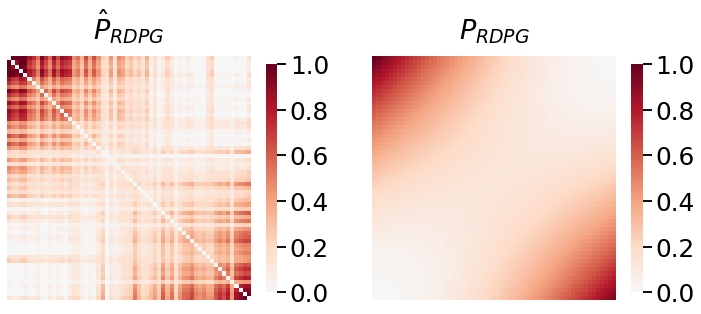

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

heatmap(Phat,
        vmin=0,
        vmax=1,
        font_scale=1.5,
        title="$\hat P_{RDPG}$",
        ax=axs[0])

heatmap(P,
        vmin=0,
        vmax=1,
        font_scale=1.5,
        title="$P_{RDPG}$",
        ax=axs[1])

fig;

Note that our estimated probability matrix tends to preserve the pattern in the true probability matrix, where the probabilities are highest for pairs of nodes which are closer together, but lower for pairs of nodes which are farther apart. 

What if we did not know that $d$ was $2$ ahead of time? The RDPG Estimator handles this situation just as well, and we can estimate the number of latent dimensions with $\hat d$ instead:

In [12]:
model = RDPGEstimator(loops=False)  # number of latent dimensions is not known
model.fit(A)
Phat = model.p_mat_
print("Fit number of latent dimensions: {}".format(model.latent_.shape[1]))

Fit number of latent dimensions: 4


So we can see that choosing the best-fit elbow instead yielded $\hat d = 3$; that is, the number of latent dimensions are estimated to be $3$. Again, looking at the estimated and true probability matrices:

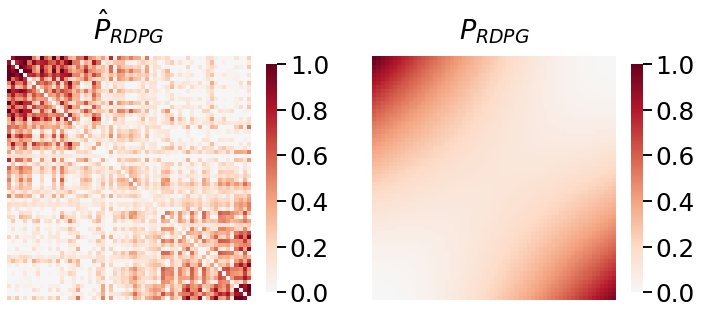

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

heatmap(Phat,
        vmin=0,
        vmax=1,
        font_scale=1.5,
        title="$\hat P_{RDPG}$",
        ax=axs[0])

heatmap(P,
        vmin=0,
        vmax=1,
        font_scale=1.5,
        title="$P_{RDPG}$",
        ax=axs[1])

fig;

Which also is a decent estimate of the true probability matrix $P$.

## *a posteriori* Stochastic Block Model

Finally, we can return to our original goal, which was to estimate the parameters of an *a posteriori* Stochastic Block Model.

For the *a posteriori* Stochastic Block Model with $K$-communities, recall that we have two parameters, $\vec \pi$ which is a $K$-dimensional probability vector, and $B$ which is the $K \times K$ block matrix. We observe the network $A$, which is a realization of the random network $\pmb A$. To estimate $\vec \pi$ and $B$, the approach we will take will be to use $A$ to produce a *best guess* as to which community each node of $A$ is from, and then use our *best guesses* as to which community each node is from to learn about $\vec \pi$ and $B$.

### Number of communities $K$ is known

When the number of communities is known, the procedure for fitting an *a posteriori* Stochastic Block Model to a network is relatively straightforward. Let's consider a similar example to the scenario we had above, but with $3$ communities instead of $2$. We will have a block matrix given by:
\begin{align*}
    B &= \begin{bmatrix}
        0.8 & 0.2 & 0.2 \\
        0.2 & 0.8 & 0.2 \\
        0.2 & 0.2 & 0.8
    \end{bmatrix}
\end{align*}
Which is a Stochastic block model in which the within-community edge probability is $0.8$, and exceeds the between-community edge probability of $0.2$. We will let the probability of each node being assigned to different blocks be equal, and we will produce a matrix with $100$ nodes in total. For simulating from the Stochastic Block Model, we actually only need the number of nodes for each community, since none of the mathematical operations we take to learn about $\vec \pi$ and $B$ will produce a different answer if we were to reorder the nodes in the network.

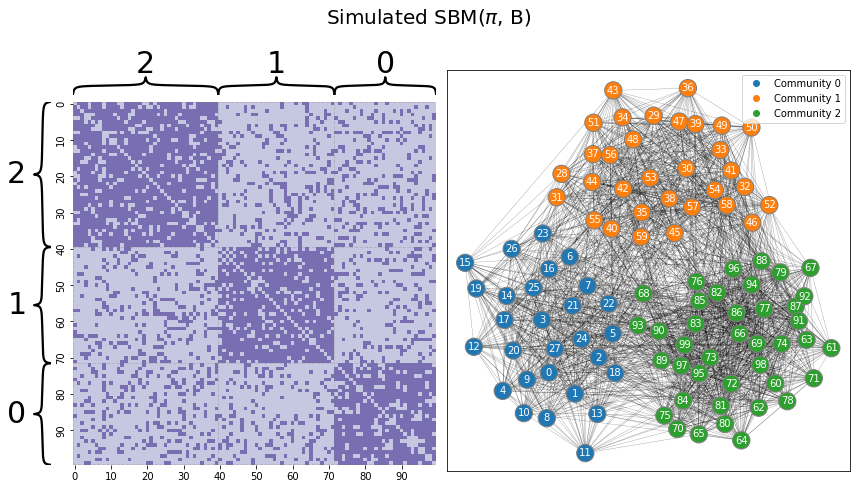

In [14]:
pi_vec = [1/3, 1/3, 1/3]
n = 100
# sample counts of each community with probability pi, equivalent to
# sampling a community for each node individually
ns = np.random.multinomial(n, pi_vec, size=1).flatten()

B = [[0.8, 0.2, 0.2],
     [0.2, 0.8, 0.2],
     [0.2, 0.2, 0.8]]
np.random.seed(12)
A = sbm(n=ns, p = B)

# the true community labels
y = [0 for i in range(0,ns[0])] + [1 for i in range(0, ns[1])] + [2 for i in range(0, ns[2])]
draw_multiplot(A, labels=y, xticklabels=10, yticklabels=10, title="Simulated SBM($\pi$, B)");

Remember, however, that we do not *actually* know the community labels of each node in $A$, so this problem is a little more difficult than it might seem. Remember that as we learned in the single network models section, even though the communities eachh node is assigned to *look* obvious, this is an artifact of the ordering of the nodes. In real data, the nodes might not actually be ordered in a manner which makes the community structure as readily apparent.

To proceed, we cannot simply use the `SBMEstimator` class like we did previously. This is because the `SBMEstimator` uses node community assignments, which we do not have. Instead, what we will do is turn again to the adjacency spectral embedding, to reduce the observed network $A$ to a an estimated latent position matrix, $\hat X$. Then, we will use K-Means clustering (or an alternative clustering technique, such as Gaussian Mixture Model) to assign each node's latent position to a particular community. Finally, we will use the communities to which each node is assigned to infer about the block matrix, $B$. We will demonstrate how to use K-means clustering to infer block labels here. We begin by first embedding $A$ to estimate a latent position matrix:

In [15]:
from graspologic.embed import AdjacencySpectralEmbed

ase = AdjacencySpectralEmbed()  # adjacency spectral embedding, with optimal number of latent dimensions selected using elbow picking
Xhat = ase.fit_transform(A)

### Pairs Plots

When embedding a matrix using any embedding techniques of `graspologic`, it is critical to investigate the quality of an embedding. One technique to do so that is particularly useful for uncovering "latent structure" (community assignments which are present, but *unknown* by us ahead of time) from a graph we suspect might be well-fit by a Stochastic Block Model is known as a "pairs plot". In a pairs plot, we investigate how effectively the embedding "separates" nodes within the dataset into individual "clusters". We will ultimately exploit these "clusters" that appear in the latent positions to generate community assignments for each node. To demonstrate the case where the "pairs plot" shows obvious latent community structure, we will use the predicted latent position matrix we just produced, from an adjacency matrix which is a realization of a random network which is truly a Stochastic Block Model. The pairs plot looks like this:

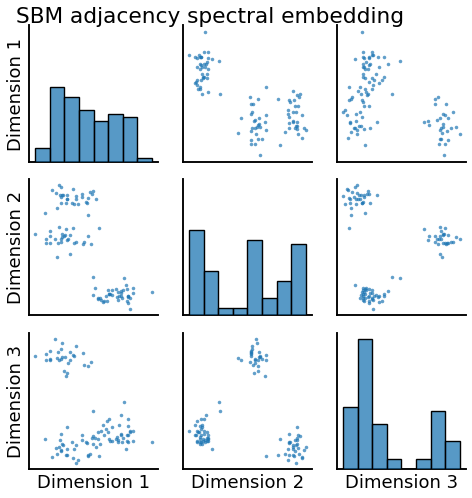

In [16]:
from graspologic.plot import pairplot

_ = pairplot(Xhat, title="SBM adjacency spectral embedding")

As we can see, the pairs plot is a `d x d` matrix of plots, where `d` is the total number of features of the matrix for which a pairs plot is being produced. For each off-diagonal plot (the plots with the dots), the $k^{th}$ row and $l^{th}$ column scatter plot has the points $(x_{ik}, x_{il})$ for each node $i$ in the adjacency matrix. Stated another way, the off-diagonal plot is a scatter plot for each node of the $k^{th}$ dimension and the $l^{th}$ dimension of the latent position matrix. That these scatter plots indicate that the points appear to be separated into individual clusters provides evidence that the latent position matrix contains latent community structure from the realized network, and is a sign that we will find reasonable "guesses" at community assignments further down the line.

The diagonal elements simply represent histograms of the indicated values for the indicated dimension. Higher bars indicate that more points are have weights in that range. For instance, the top-left histogram indicates a histogram of the first latent dimension for all nodes, the middle histogram is a histogram of the second latent dimension for all nodes, so on and so forth.

Next, we will show a brief example of what happens when adjacency spectral embedding does not indicate that there is latent community structure. Our example network here will be a realization of a network which is ER, with a probability of $0.5$ for an edge existing between any pair of nodes. As an ER network does not have community structure, we would not expect the pairs plot to show discernable clusters. 

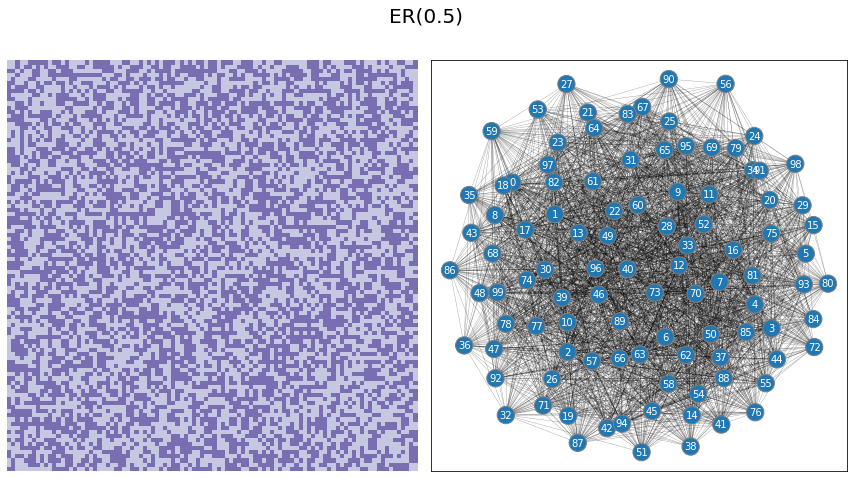

In [17]:
from graspologic.simulations import er_np

A_er = er_np(n=100, p = 0.5)
draw_multiplot(A_er, title="ER(0.5)");

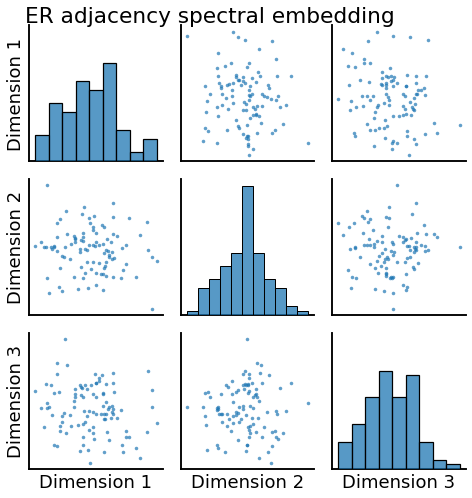

In [18]:
ase_er = AdjacencySpectralEmbed(n_components=3)  # adjacency spectral embedding, with optimal number of latent dimensions selected using elbow picking
Xhat_er = ase_er.fit_transform(A_er)

_ = pairplot(Xhat_er, title="ER adjacency spectral embedding")

Unlike the SBM example, the scatter plots for the adjacency spectral embedding of a realization of an ER network no longer show the distinct separability into individual communities. 

Next, let's return to our SBM example and obtain some predicted community assignments for our points. Since we do not have any information as to which cluster each node is assigned to, we must use an unsupervised clustering method. We will use the `KMeans` function from `sklearn`'s cluster module to do so. Since we know that the SBM has 3 communities, we will use 3 clusters for the KMeans algorithm. The clusters produced by the `KMeans` algorithm will be our "predicted" community assignments.

In [19]:
from sklearn.cluster import KMeans

labels_kmeans = KMeans(n_clusters = 3).fit_predict(Xhat)

Since we have simulated data, we have the benefit of being able to evaluate the quality of our predicted community assignments to the true community assignments. We will use the Adjusted Rand Index (ARI), which is a measure of the clustering accuracy. A high ARI (near $1$) indicates a that the predicted community assignments are good relative the true community assignments, and a low ARI (near $0$) indicates that the predicted community assignments are not good relative the true community assignments. The ARI is agnostic to the names of the different communities, which means that even if the community labels assigned by unsupervised learning do not match the community labels in the true realized network, the ARI is still a legitimate statistic we can investigate. We will look more at the implications of this in the following paragraph.

In [20]:
from sklearn.metrics import adjusted_rand_score

ari_kmeans = adjusted_rand_score(labels_kmeans, y)
print("ARI(predicted communities, true communities) = {}".format(ari_kmeans))

ARI(predicted communities, true communities) = 1.0


The ARI of $1$ indicates that the true communities and the predicted communities are in complete agreement!

When using unsupervised learning to learn about labels (such as, in this case, community assignments) for a given set of points (such as, in this case, the latent positions of each of the $n$ *nodes* of our realized network), a truly unsupervised approach knows *nothing* about the true labels for the set of points. This has the implication that the assigned community labels may not make sense in the context of the true labels, or may not align. For instance, a predicted community of $2$ may not mean the same thing as the true community being $2$, since the true community assignments did not have any *Euclidean* relevance to the set of points we clustered. This means that we may have to remap the labels from the unsupervised learning predictions to better match the true labels so that we can do further diagnostics. For this reason, the `graspologic` package offers the `remap_labels` utility function:

In [21]:
from graspologic.utils import remap_labels

labels_kmeans_remap = remap_labels(y, labels_kmeans)

We can use these remapped labels to understand when `KMeans` is, or is not, producing reasonable labels for our investigation. We begin by first looking at a pairs plot, which now will color the points by their assigned community:

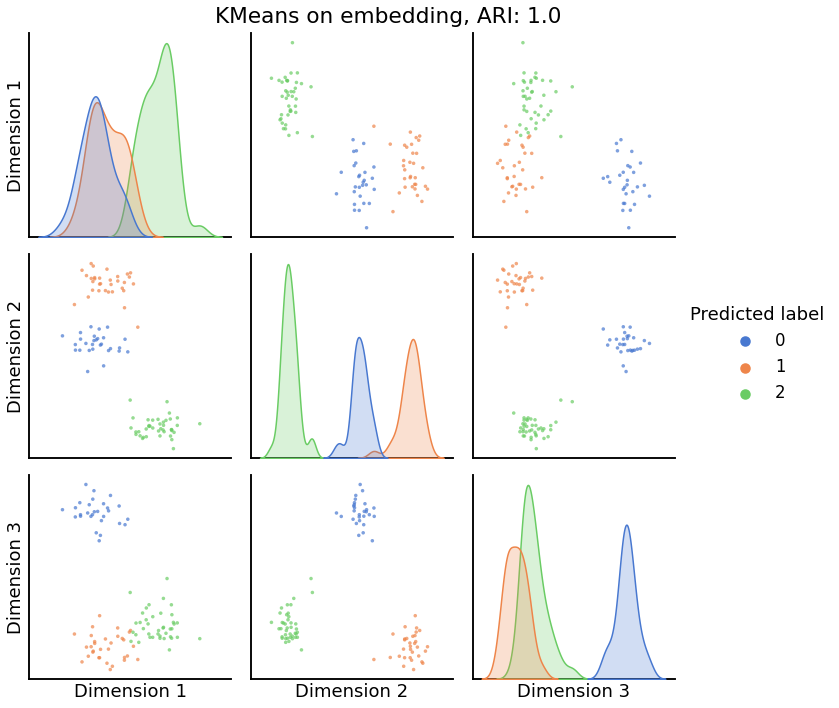

In [22]:
pairplot(Xhat,
         labels=labels_kmeans_remap,
         title=f'KMeans on embedding, ARI: {str(ari_kmeans)[:5]}',
         legend_name='Predicted label',
         height=3.5,
         palette='muted',);

The final utility of the pairs plot is that we can investigate which points, if any, the clustering technique is getting wrong. We can do this by looking at the classification error of the nodes to each community:

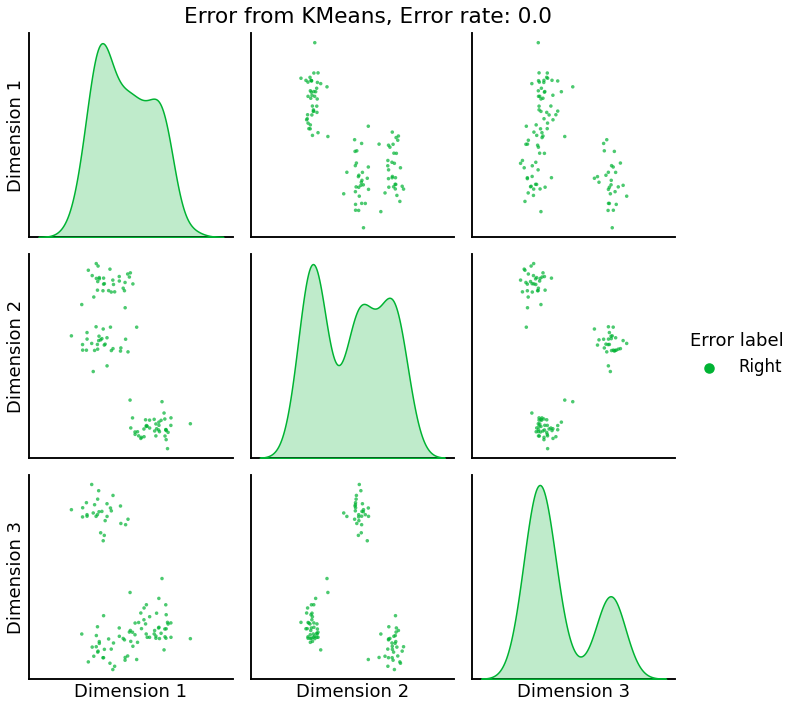

In [23]:
error = y - labels_kmeans_remap  # compute which assigned labels from labels_kmeans_remap differ from the true labels y
error = error != 0  # if the difference between the community labels is non-zero, an error has occurred
er_rt = np.mean(error)  # error rate is the frequency of making an error

palette = {'Right':(0,0.7,0.2),
           'Wrong':(0.8,0.1,0.1)}

error_label = np.array(len(y)*['Right'])  # initialize numpy array for each node
error_label[error] = 'Wrong'  # add label 'Wrong' for each error that is made

pairplot(Xhat,
         labels=error_label,
         title=f'Error from KMeans, Error rate: {str(er_rt)}',
         legend_name='Error label',
         height=3.5,
         palette=palette,);

Great! Our classification has not made any errors.

Next, let's learn about the parameters, $\vec \pi$ and $B$. To learn about $\vec \pi$ is rather simple. Our "best guess" at the probability of a node being assigned to a particular community is simply the fraction of nodes which are assigned to that community by the clustering technique we used:

In [24]:
un, counts = np.unique(labels_kmeans_remap, return_counts=True)
cts = dict(zip(un, counts/np.sum(counts)))
for k, v in cts.items():
    print("pi_{}hat: {}".format(k, v))

pi_0hat: 0.28
pi_1hat: 0.32
pi_2hat: 0.4


So the predicted community assignment probability vector, $\hat{\vec\pi}$, does not exactly match the true community assignment probability vector, $\vec \pi = \begin{bmatrix}\frac{1}{3} & \frac{1}{3} & \frac{1}{3}\end{bmatrix}$. To learn about the probability matrix $P$, we can now use the `SBMEstimator` class, with our predicted labels:

In [25]:
model = SBMEstimator(directed=False, loops=False)
model.fit(A, y=labels_kmeans_remap)
Phat = model.p_mat_

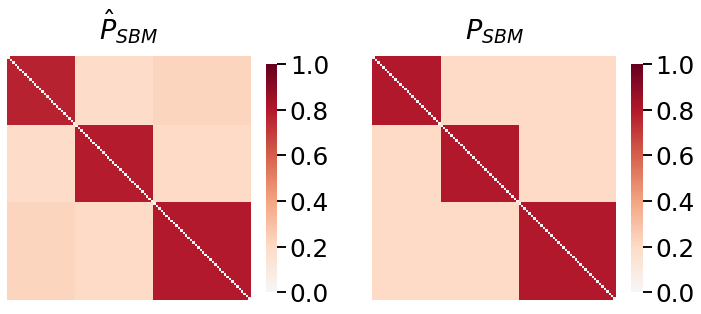

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

heatmap(Phat,
        vmin=0,
        vmax=1,
        font_scale=1.5,
        title="$\hat P_{SBM}$",
        ax=axs[0])

P = 0.2*np.ones((np.sum(counts), np.sum(counts)))  # default entries to 0.2
P[0:counts[0],0:counts[0]] = 0.8  # B11
P[counts[0]:(counts[0] + counts[1]),counts[0]:(counts[0] + counts[1])] = 0.8  # B22
P[(counts[0] + counts[1]):(counts[0] + counts[1] + counts[2]),
  (counts[0] + counts[1]):(counts[0] + counts[1] + counts[2])] = 0.8  # B33
np.fill_diagonal(P, 0)

heatmap(P,
        vmin=0,
        vmax=1,
        font_scale=1.5,
        title="$P_{SBM}$",
        ax=axs[1])

fig;

### Number of communities $K$ is not known

In real data, we almost never have the beautiful canonical modular structure obvious to us from a Stochastic Block Model. This means that it is *extremely infrequently* going to be the case that we know exactly how we should set the number of communities, $K$, ahead of time.

Let's first remember back to the single network models section, when we took a Stochastic block model with obvious community structure, and let's see what happens when we just move the nodes of the adjacency matrix around. We begin with a similar adjacency matrix to $A$ given above, for the $3$-community SBM example, but with the within and between-community edge probabilities a bit closer together so that we can see what happens when we experience errors. The communities are still slightly apparent, but less so than before:

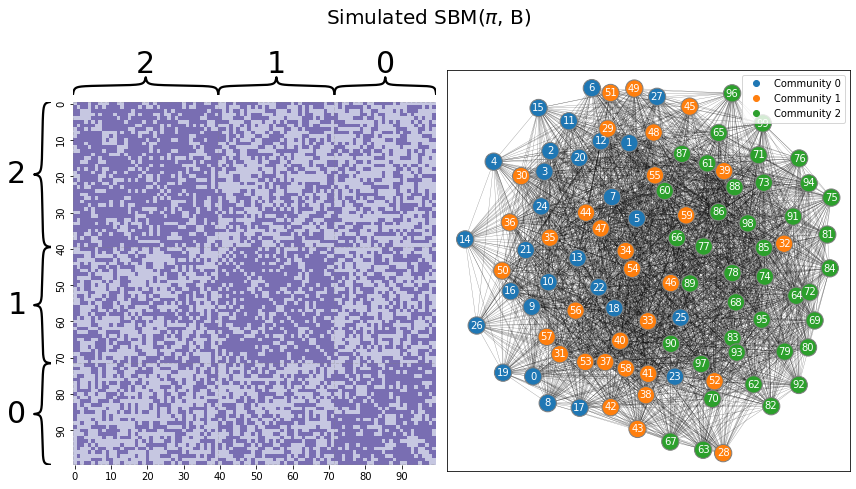

In [27]:
B = [[0.7, 0.45, 0.35],
     [0.45, 0.7, 0.45],
     [0.35, 0.45, 0.7]]
np.random.seed(12)
A = sbm(n=ns, p = B)

# the true community labels
y = [0 for i in range(0,ns[0])] + [1 for i in range(0, ns[1])] + [2 for i in range(0, ns[2])]
draw_multiplot(A, labels=y, xticklabels=10, yticklabels=10, title="Simulated SBM($\pi$, B)");

Next, we permute the nodes around to reorder the realized adjacency matrix:

In [28]:
# generate a reordering of the n nodes
vtx_perm = np.random.choice(A.shape[0], size=A.shape[0], replace=False)

A_permuted = A[tuple([vtx_perm])] [:,vtx_perm]
y_perm = np.array(y)[vtx_perm]

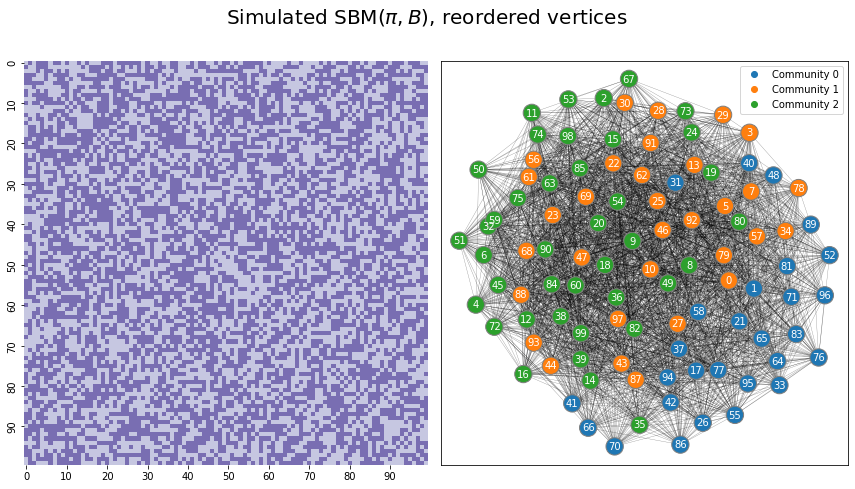

In [29]:
from graphbook_code import heatmap as hm_code 
from graphbook_code import draw_layout_plot as lp_code

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# heatmap
hm = hm_code(
    A_permuted,
    ax=axs[0],
    cbar=False,
    color="sequential",
    xticklabels=10,
    yticklabels=10
)

# layout plot
lp_code(A_permuted, ax=axs[1], pos=None, labels=y_perm, node_color="qualitative")
plt.suptitle("Simulated SBM($\pi, B$), reordered vertices", fontsize=20, y=1.1)
    
fig;

We only get to see the adjacency matrix in the *left* panel; the panel in the *right* is constructed by using the true labels (which we do *not* have!). This means that we proceed for statistical inference about the random network underlying our realized network using *only* the heatmap we have at right. It is not immediately obvious that this is the realization of a random network which is an SBM with $3$ communities.

Our procedure is *very* similar to what we did previously. We again embed using the "elbow picking" technique:

In [30]:
ase_perm = AdjacencySpectralEmbed()  # adjacency spectral embedding, with optimal number of latent dimensions selected using elbow picking
Xhat_permuted = ase_perm.fit_transform(A_permuted)

We examine the pairs plot, *just* like we did previously:

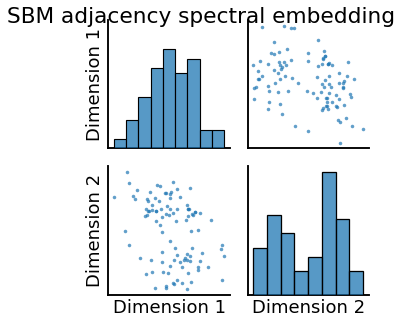

In [31]:
_ = pairplot(Xhat_permuted, title="SBM adjacency spectral embedding")

We can still see that there is some level of latent community structure apparent in the pairs plot. This is evident from, for instance, the plots of Dimension 2 against Dimension 3, where we can see that the latent positions of respective nodes *appear* to be clustering in some way.

Next, we have the biggest difference with the approach we took previously. Since we do *not* know the optimal number of clusters $K$ *nor* the true community assignments, we must choose an unsupervised clustering technique which allows us to *compare* clusterings with different choices of clusters. We can again perform this using the `KMeans` algorithm that we used previously. Here, we will compare the quality of a clustering with one number of clusters to the quality of a clustering with a *different* number of clusters using the silhouette score. The optimal clustering is selected to be the clustering which has the largest silhouette score across all attempted numbers of clusters.

This feature is implemented automatically in the `KMeansCluster` function of `graspologic`. We will select the number of clusters which maximizes the silhouette score, and will allow at most $10$ clusters total to be produced:

In [32]:
from graspologic.cluster import KMeansCluster

km_clust = KMeansCluster(max_clusters = 10)
km_clust = km_clust.fit(Xhat_permuted);

Next, we visualize the silhouette score as a function of the number of clusters:

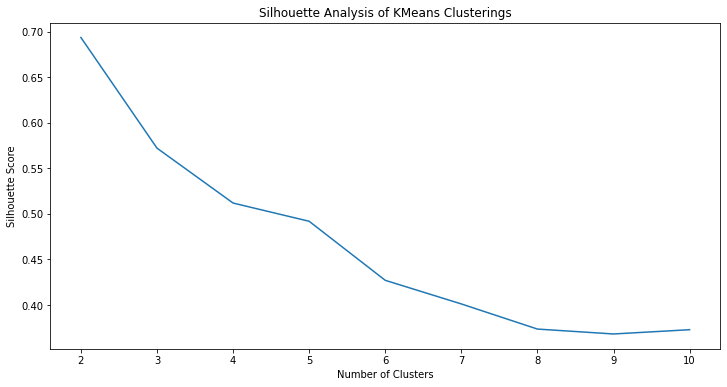

In [33]:
from pandas import DataFrame as df

nclusters = range(2, 11)  # graspologic nclusters goes from 2 to max_clusters
silhouette = km_clust.silhouette_  # obtain the respective silhouette scores

silhouette_df = df({"Number of Clusters": nclusters, "Silhouette Score": silhouette})  # place into pandas dataframe

fig, ax = plt.subplots(1,1,figsize=(12, 6))

sns.lineplot(data=silhouette_df,ax=ax, x="Number of Clusters", y="Silhouette Score");
ax.set_title("Silhouette Analysis of KMeans Clusterings")
fig;

As we can see, Silhouette Analysis has indicated the best number of clusters as $3$ (which, is indeed, *correct* since we are performing a simulation where we know the right answer). Next, let's take a look at the pairs plot for the optimal classifier. We begin by producing the predicted labels for each of our nodes, and remapping to the true community assignment labels, exactly as we did previously for further analysis:

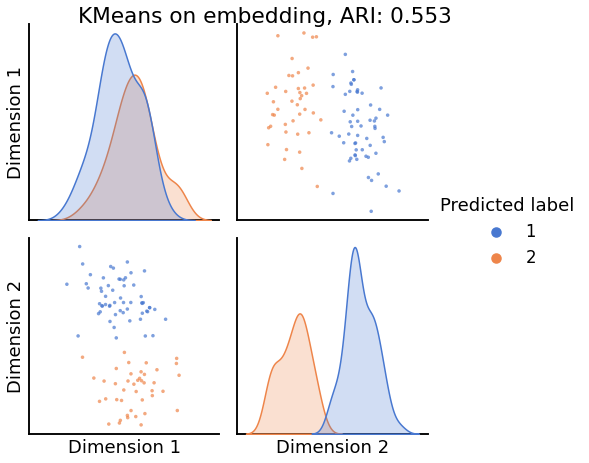

In [34]:
labels_autokmeans = km_clust.fit_predict(Xhat_permuted)
labels_autokmeans = remap_labels(y_perm, labels_autokmeans)


ari_kmeans = adjusted_rand_score(labels_autokmeans, y_perm)

pairplot(Xhat_permuted,
         labels=labels_autokmeans,
         title=f'KMeans on embedding, ARI: {str(ari_kmeans)[:5]}',
         legend_name='Predicted label',
         height=3.5,
         palette='muted',);

`KMeans` was still able to find relatively stable clusters, which align quite well (ARI of $0.942$, which is near $1$) with the true labels! Next, we will look at which points `KMeans` tends to get *wrong* to see if any patterns arise:

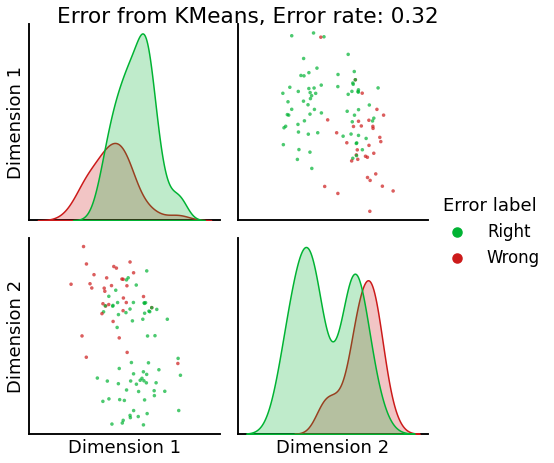

In [35]:
error = y_perm - labels_autokmeans  # compute which assigned labels from labels_kmeans_remap differ from the true labels y
error = error != 0  # if the difference between the community labels is non-zero, an error has occurred
er_rt = np.mean(error)  # error rate is the frequency of making an error

palette = {'Right':(0,0.7,0.2),
           'Wrong':(0.8,0.1,0.1)}

error_label = np.array(len(y)*['Right'])  # initialize numpy array for each node
error_label[error] = 'Wrong'  # add label 'Wrong' for each error that is made

pairplot(Xhat_permuted,
         labels=error_label,
         title=f'Error from KMeans, Error rate: {str(er_rt)}',
         legend_name='Error label',
         height=3.5,
         palette=palette,);

And there do not appear to be any dramatic issues in our clustering which woul suggest systematic errors are present. To infer about $\vec \pi$ or $B$, we would proceed exactly as we did previously, by using these labels with the `SBMEstimator` class to perform inference:

In [36]:
un, counts = np.unique(labels_autokmeans, return_counts=True)
cts = dict(zip(un, counts/np.sum(counts)))
for k, v in cts.items():
    print("pi_{}hat: {}".format(k, v))

pi_1hat: 0.58
pi_2hat: 0.42


In [37]:
model = SBMEstimator(directed=False, loops=False)
model.fit(A_permuted, y=labels_autokmeans)
Phat = model.p_mat_

We do not plot $P$ due to the fact that the random shuffling of the node order leaves the plot relatively uninterpretable.

```{admonition} a posteriori Stochastic Block Model, Recap
We just covered many details about how to perform statistical inference with a realization of a random network which we think can be well summarized by a Stochastic Block Model. For this reason, we will review some of the key things that were covered, to better put them in context:
1. We learned that the Adjacency Spectral Embedding is a key algorithm for making sense of networks we believe may be realizations of networks which are well-summarized by Stochastic Block Models, as inference on the the *estimated latent positions* is key for learning about community assignments.
2. We learned how unsupervised learning allows us to use the estimated latent positions to learn community assignments for nodes within our realization.
3. We learned how to *align* the labels produced by our unsupervised learning technique with true labels in our network, using `remap_labels`.
4. We learned how to produce community assignments, regardless of whether we know how many communities may be present in the first place.
```